In [1]:
%matplotlib inline
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="white")

font = {"family": "Songti SC", "size": "10.5"}
plt.figure(figsize=(6.4, 4.8))
plt.rc("font", **font)
plt.rc("axes", unicode_minus=False)

flatui = ["#DF7A5E", "#F0C986", "#82B29A", "#3C405B"]
flatui_2 = ["#DF7A5E", "#3C405B"]
palette = sns.light_palette("seagreen", as_cmap=True)

common_tick_params = dict(
    direction="in",
    length=4,
    width=1.5,
    colors="black",
    grid_color="black",
    grid_alpha=0.5,
)

africa_region = {"E": "东部非洲", "W": "西部非洲", "S": "南部非洲", "C": "中部非洲"}
abbreviation = {"SSA": "撒哈拉以南非洲", "LMY": "中低收入国家", "HIC": "高收入国家", "WLD": "全球"}
abbreviation_2 = {"SSA": "撒哈拉以南非洲", "LMY": "中低收入国家", "HIC": "高收入国家", "OWID_WRL": "全球"}

dfgeo = pd.read_excel(
    pathlib.Path.home()
    / "OneDrive"
    / "Rawdata"
    / "Country Classification"
    / "UN Classification_Natural resources_Geography.xlsx",
    sheet_name="Sheet1",
    na_values="..",
    usecols="D, E, F, H",
)

output = pathlib.Path.home() / "OneDrive" / "PhD Dissertation" / "Pictures"
years = list(range(2001, 2021))

<Figure size 640x480 with 0 Axes>

In [2]:
# 选取“世界”的数据
df_world = pd.read_csv(
    pathlib.Path.home() / "OneDrive/Rawdata/World Bank World Development Index/WDI_csv/WDIData.csv",
    na_values="..",
)
df_world = (
    df_world.drop(columns=["Country Name", "Indicator Code"])
    .rename(columns={"Country Code": "Alpha-3 code"})
    .query(
        '`Alpha-3 code` == "WLD" | `Alpha-3 code` == "SSA"|`Alpha-3 code` == "LMY"| `Alpha-3 code` == "HIC"'
    )
    .drop(columns=["Unnamed: 67"])
    .melt(id_vars=("Alpha-3 code", "Indicator Name"))
    .astype({"variable": "int64", "value": "float64"})
    .pivot_table(
        columns="Indicator Name",
        values="value",
        index=["Alpha-3 code", "variable"],
        dropna="..",
    )
    .reset_index()
    .rename(columns={"variable": "Year"})
    .query("Year in @years")
)

df_world.to_excel(
    pathlib.Path.home()
    / "OneDrive"
    / "PhD Dissertation"
    / "Data_Code"
    / "Data"
    / "df_world.xlsx",
    index=True,
)

df = pd.read_excel(
    pathlib.Path.home()
    / "OneDrive"
    / "PhD Dissertation"
    / "Data_Code"
    / "Data"
    / "index_data.xlsx"
)

<Figure size 640x480 with 0 Axes>

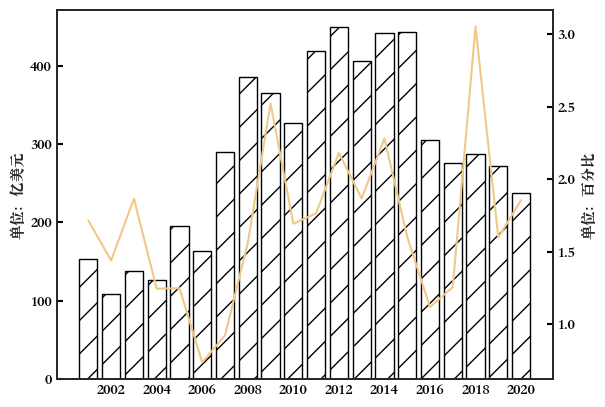

In [3]:
#################2005~2019年非洲FDI流量及占全球FDI比重趋势图
data = df_world[
    [
        "Alpha-3 code",
        "Year",
        "Foreign direct investment, net inflows (BoP, current US$)",
    ]
]
data1 = data.query('`Alpha-3 code`=="SSA"').rename(
    columns={"Foreign direct investment, net inflows (BoP, current US$)": "FDI_SSA"}
)
data2 = data1.merge(
    data.query('`Alpha-3 code`=="WLD"'), how="left", on=["Year"]
).rename(
    columns={"Foreign direct investment, net inflows (BoP, current US$)": "FDI_WLD"}
)

data2["percent"] = (data2["FDI_SSA"] / data2["FDI_WLD"]) * 100


plt.figure(figsize=(6.4, 4.8))
sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(1, 1)


ax1.bar(
    data2["Year"],
    data2["FDI_SSA"] / 100_000_000,
    color="white",
    edgecolor="black",
    hatch="/",
)
ax1.set_ylabel("单位：亿美元", size=10.5)
ax1.tick_params(**common_tick_params)

ax2 = ax1.twinx()
ax2.plot(data2["Year"], data2["percent"], color="#F0C986")

ax2.tick_params(**common_tick_params)
ax2.set_ylabel("单位：百分比", size=10.5)

plt.xticks(range(2002, 2021, 2))
plt.xlabel("")


plt.savefig(output / "2005~2020年非洲FDI流量及占全球FDI比重趋势图.png", dpi=300, bbox_inches="tight")

In [4]:
(data1.loc[data1["Year"] == 2020, "FDI_SSA"].values[0] / data1.loc[data1["Year"] == 2001, "FDI_SSA"].values[0]) ** (1/19) - 1

0.023111192345484977

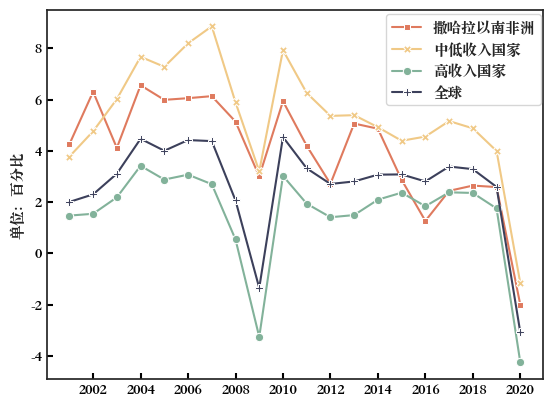

In [5]:
# 2005~2019年非洲FDI、中低收入国家、高收入国家及全球GDP增长率趋势图
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)
ax = sns.lineplot(
    x="Year",
    y="GDP growth (annual %)",
    err_style=None,
    hue="Alpha-3 code",
    hue_order=abbreviation.keys(),
    style="Alpha-3 code",
    dashes=False,
    legend=False,
    markers=True,
    data=df_world,
)

ax.legend(
    abbreviation.values(),
    loc="best",
    bbox_to_anchor=(0.67, 0.722),
    ncol=1,
    fontsize=10.5,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

ax.set_xticks(range(2002, 2021, 2))
ax.set_ylabel("单位：百分比", size=10.5)
ax.set_xlabel("")

plt.savefig(
    output / "2005~2020年非洲FDI、发展中国家及全球GDP增长率趋势图.png", dpi=300, bbox_inches="tight"
)

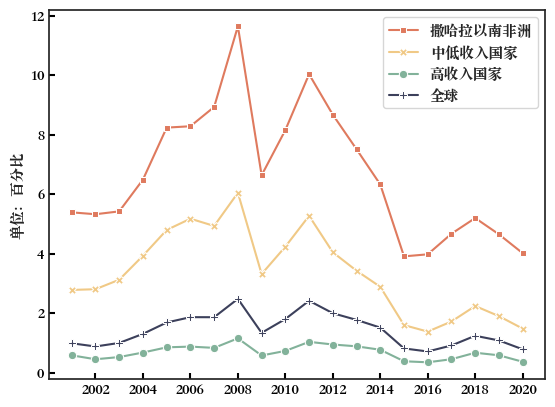

In [6]:
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)
ax = sns.lineplot(
    x="Year",
    y="Adjusted savings: natural resources depletion (% of GNI)",
    err_style=None,
    hue="Alpha-3 code",
    hue_order=abbreviation.keys(),
    style="Alpha-3 code",
    dashes=False,
    legend=False,
    markers=True,
    data=df_world,
)

ax.legend(
    abbreviation.values(),
    loc="best",
    # bbox_to_anchor=(0.67, 0.722),
    ncol=1,
    fontsize=10.5,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

ax.set_xticks(range(2002, 2021, 2))
ax.set_ylabel("单位：百分比", size=10.5)
ax.set_xlabel("")
plt.savefig(output / "2005~2020年非洲、发展中国家及全球自然资源损耗趋势图.png", dpi=300, bbox_inches="tight")

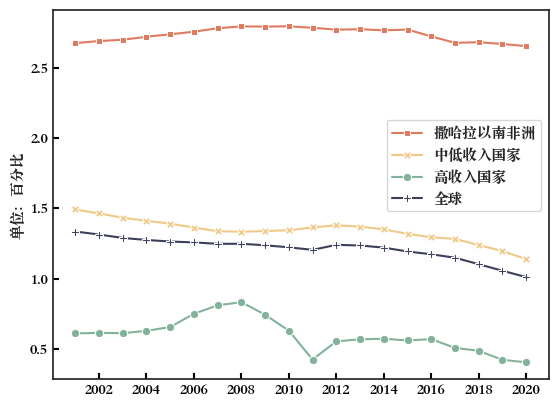

In [7]:
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)
ax = sns.lineplot(
    x="Year",
    y="Population growth (annual %)",
    err_style=None,
    hue="Alpha-3 code",
    hue_order=abbreviation.keys(),
    style="Alpha-3 code",
    dashes=False,
    legend=False,
    markers=True,
    data=df_world,
)

ax.legend(
    abbreviation.values(),
    loc="best",
    bbox_to_anchor=(1, 0.722),
    ncol=1,
    fontsize=10.5,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

ax.set_xticks(range(2002, 2021, 2))
ax.set_ylabel("单位：百分比", size=10.5)
ax.set_xlabel("")
plt.savefig(output / "2005~2020年非洲、发展中国家及全球人口增长率趋势图.png", dpi=300, bbox_inches="tight")

/Users/tcztzy/GitHub/han2023/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 32.125000000000014, '男性平均寿命')

<Figure size 640x480 with 0 Axes>

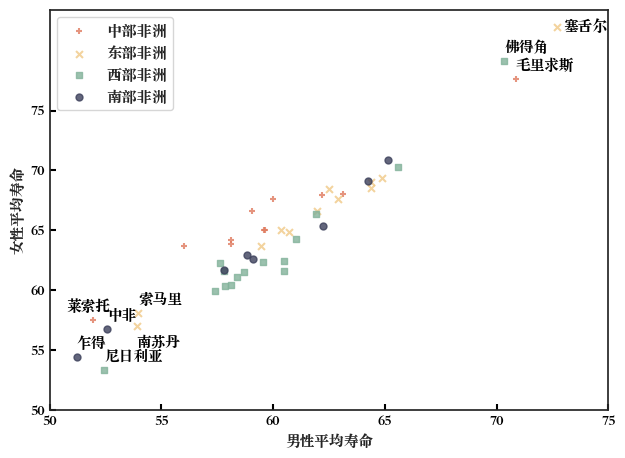

In [8]:
import pathlib

import requests_cache
import wbgapi as wb

requests_cache.install_cache()
route = pathlib.Path.home() / "OneDrive" / "Rawdata"
countrycode = pd.read_excel(
    route / "Country Code" / "Countrycode.xlsx",
    sheet_name="Sheet1",
    na_values="..",
)
life_exp = wb.data.DataFrame(
    ["SP.DYN.LE00.FE.IN", "SP.DYN.LE00.MA.IN", "SP.DYN.LE00.IN"],
    wb.region.members("SSF"),
    2020,
)


data = (
    life_exp.merge(countrycode, left_index=True, right_on="Alpha-3 code")
    .merge(dfgeo, on="Numeric")
    .set_index("CountryName_CN")
    .query("Region != 'N'")
    .rename(columns={"SP.DYN.LE00.FE.IN": "女性平均寿命", "SP.DYN.LE00.MA.IN": "男性平均寿命"})[
        ["女性平均寿命", "男性平均寿命", "Region"]
    ]
)
data["地区"] = data["Region"].str.translate(str.maketrans(africa_region))

plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)

ax = sns.lmplot(
    x="男性平均寿命",
    y="女性平均寿命",
    hue="地区",
    legend=False,
    markers=["+", "x", "s", "o"],
    fit_reg=False,
    scatter_kws={"s": 25},
    data=data,
    height=4.8,
    aspect=6.4 / 4.8,
)
sns.despine(top=False, right=False, left=False, bottom=False)
for z, r in data.iterrows():
    lem = r["男性平均寿命"]
    lef = r["女性平均寿命"]
    if lem > 67 or lem < 55:
        if z == "南苏丹":
            x = lem
            y = lef - 1.7
        elif z == "莱索托":
            x = lem - 1.2
            y = lef + 0.8
        elif z == "塞舌尔":
            x = lem + 0.3
            y = lef - 0.3
        else:
            x = lem
            y = lef + 0.8
        plt.text(
            x,
            y,
            z,
            horizontalalignment="left",
            size="medium",
            color="black",
            weight="semibold",
        )

plt.tick_params(
    left=True,
    bottom=True,
    **common_tick_params,
)
plt.legend(["中部非洲", "东部非洲", "西部非洲", "南部非洲"], loc="upper left")
plt.xticks(range(50, 80, 5))
plt.yticks(range(50, 80, 5))
plt.ylabel("女性平均寿命", size=10.5)
plt.xlabel("男性平均寿命", size=10.5)

In [42]:
df_world[["Alpha-3 code", "Year", "Industry (including construction), value added (constant 2015 US$)"]]

Indicator Name,Alpha-3 code,Year,"Industry (including construction), value added (constant 2015 US$)"
41,HIC,2001,9.224719e+12
42,HIC,2002,9.257322e+12
43,HIC,2003,9.475980e+12
44,HIC,2004,9.856277e+12
45,HIC,2005,1.006228e+13
...,...,...,...
245,WLD,2016,2.076016e+13
246,WLD,2017,2.152548e+13
247,WLD,2018,2.225166e+13
248,WLD,2019,2.266061e+13


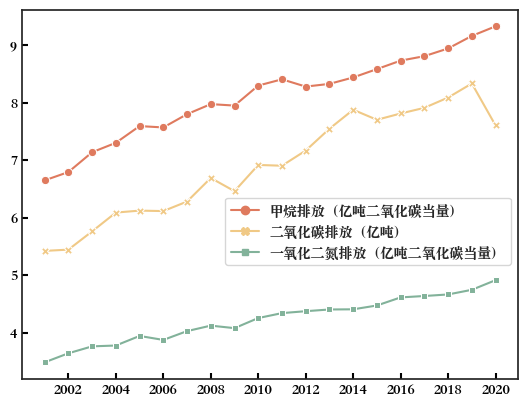

In [9]:
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)

df_ssa = df_world.query('`Alpha-3 code`=="SSA"')[
    [
        "Year",
        "Methane emissions (kt of CO2 equivalent)",
        "CO2 emissions (kt)",
        "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
    ]
].rename(
    columns={
        "Methane emissions (kt of CO2 equivalent)": "甲烷排放（亿吨二氧化碳当量）",
        "CO2 emissions (kt)": "二氧化碳排放（亿吨）",
        "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)": "一氧化二氮排放（亿吨二氧化碳当量）",
    }
)
df_ssa[["甲烷排放（亿吨二氧化碳当量）", "二氧化碳排放（亿吨）", "一氧化二氮排放（亿吨二氧化碳当量）"]] /= 100_000

ax = sns.lineplot(
    data=pd.melt(df_ssa, ["Year"]).rename(columns={"Indicator Name": "指标"}),
    x="Year",
    y="value",
    hue="指标",
    # hue_order=abbreviation.keys(),
    style="指标",
    # dashes=False,
    # legend=False,
    markers=True,
    dashes=False,
)
ax.set(xlabel="", ylabel="", xticks=range(2002, 2021, 2))
ax.legend(
    loc="center right",
    bbox_to_anchor=(1, 0.4),
    ncol=1,
    fontsize=10,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

# ax.set_yticks(range(30_000, 100_000, 10_000))
plt.savefig(output / "2005~2020年撒哈拉以南非洲环境污染趋势图.png", dpi=300, bbox_inches="tight")

In [10]:
df_world.query("`Alpha-3 code` =='SSA'")[["Year", "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",         "Methane emissions (kt of CO2 equivalent)",
        "CO2 emissions (kt)",
        "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",]]

Indicator Name,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
167,2001,NaN,665023.971674,542617.243617,349256.072502
168,2002,NaN,679409.054813,544792.452257,364925.181681
169,2003,NaN,713828.144825,576480.846164,376939.366738
170,2004,NaN,730143.768175,609110.399363,378394.448100
171,2005,42.780735,759219.829465,612500.549225,394981.138704
172,2006,NaN,756830.430456,611707.030212,388101.855145
173,2007,NaN,779877.409088,628232.184679,403376.937862
174,2008,NaN,797320.665606,669149.382288,412914.560597
175,2009,NaN,794786.465342,646225.921108,408545.495995
176,2010,42.644037,829510.779410,691744.397224,426060.025329


In [11]:
[col for col in df_world if "2.5" in col]

['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)']

In [12]:
d = df_world[
    [
        "Year",
        "Alpha-3 code",
        "Agriculture, forestry, and fishing, value added (% of GDP)",
        "Industry (including construction), value added (% of GDP)",
        "Services, value added (% of GDP)"
    ]
].query("Year==2001 | Year==2020").query("`Alpha-3 code` =='SSA'")
d

Indicator Name,Year,Alpha-3 code,"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)"
167,2001,SSA,16.503946,27.345815,48.919371
186,2020,SSA,18.277846,26.241632,49.318196


In [13]:
d2 = df_world[
    [
        "Year",
        "Alpha-3 code",
        "Agriculture, forestry, and fishing, value added (current US$)",
        "Industry (including construction), value added (current US$)",
        "Services, value added (current US$)",
        "GDP (current US$)"
    ]
].query("Year==2001 | Year==2020").query("`Alpha-3 code` =='SSA'").set_index("Year")
d2['GDP'] = d2['Agriculture, forestry, and fishing, value added (current US$)'] + d2['Industry (including construction), value added (current US$)'] + d2['Services, value added (current US$)']
d2['agri']= d2['Agriculture, forestry, and fishing, value added (current US$)']/d2['GDP']
d2['indu']= d2['Industry (including construction), value added (current US$)']/d2['GDP']
d2['serv']= d2['Services, value added (current US$)']/d2['GDP']
print(
    "2001-2020年间，撒哈拉以南非洲农业增加值占GDP比重从"
    f"{d2.loc[2001, 'agri']:.2%}"
    "增加到"
    f"{d2.loc[2020, 'agri']:.2%}"
    "，工业和建筑业增加值占GDP比重从"
    f"{d2.loc[2001, 'indu']:.2%}"
    "下降至"
    f"{d2.loc[2020, 'indu']:.2%}"
    "，服务业增加值占GDP比重从"
    f"{d2.loc[2001, 'serv']:.2%}"
    "增加至"
    f"{d2.loc[2020, 'serv']:.2%}"
    "，"
)

2001-2020年间，撒哈拉以南非洲农业增加值占GDP比重从17.79%增加到19.48%，工业和建筑业增加值占GDP比重从29.48%下降至27.96%，服务业增加值占GDP比重从52.73%增加至52.56%，


In [55]:
[col for col in df_world.columns if "constant 2015" in col]

['Adjusted net national income (constant 2015 US$)',
 'Adjusted net national income per capita (constant 2015 US$)',
 'Agriculture, forestry, and fishing, value added (constant 2015 US$)',
 'Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)',
 'Exports of goods and services (constant 2015 US$)',
 'Final consumption expenditure (constant 2015 US$)',
 'GDP (constant 2015 US$)',
 'GDP per capita (constant 2015 US$)',
 'GNI (constant 2015 US$)',
 'GNI per capita (constant 2015 US$)',
 'General government final consumption expenditure (constant 2015 US$)',
 'Gross capital formation (constant 2015 US$)',
 'Gross fixed capital formation (constant 2015 US$)',
 'Gross national expenditure (constant 2015 US$)',
 'Gross value added at basic prices (GVA) (constant 2015 US$)',
 'Households and NPISHs Final consumption expenditure (constant 2015 US$)',
 'Households and NPISHs Final consumption expenditure per capita (constant 2015 US$)',
 'Imports of goods and services (

In [62]:
df_world.query("`Alpha-3 code` =='SSA'")[["Year", "GDP (constant 2015 US$)", "GDP per capita (current US$)"]]

Indicator Name,Year,GDP (constant 2015 US$),GDP per capita (current US$)
167,2001,8.653758e+11,590.123059
168,2002,9.199473e+11,625.268397
169,2003,9.578074e+11,767.157223
170,2004,1.020619e+12,927.594753
171,2005,1.081745e+12,1072.346879
172,2006,1.147245e+12,1234.022327
173,2007,1.217611e+12,1390.592190
174,2008,1.280219e+12,1534.148268
175,2009,1.318681e+12,1436.267257
176,2010,1.396970e+12,1660.468652


In [14]:
f"GDP growth annual {(1.607317e+12/3.772387e+11) ** (1/19) - 1:.2%}"

'GDP growth annual 7.93%'

In [15]:
df_final = pd.read_csv(
    pathlib.Path.home()
    / "OneDrive"
    / "Rawdata"
    / "Data cleaning"
    / "df_final.csv"
).astype({"Numeric": "int64", "Year": "int64"}).set_index(["Numeric", "Year"])

/var/folders/dc/cbvy15k16vz7s8mls82v1ng80000gn/T/ipykernel_6613/1631935230.py:1: DtypeWarning: Columns (1483,1612,1613,1657,1659,1662,1679,1782,1783,1785,1787,2312,2379,2389,2391,2393,2394,2397,2450,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(


In [16]:
names = df_final.query("Region != 'N' and Year == 2020 and `GDP (constant 2015 US$)_x` > 50_000_000_000").sort_values("GDP (constant 2015 US$)_x", ascending=False)["CountryName_CN"]
"、".join(names[:-1]) + "和" + names.iloc[-1]

'尼日利亚、南非、埃塞俄比亚、肯尼亚、安哥拉、加纳、坦桑尼亚和科特迪瓦'

In [17]:
SSA = df_final.query("Region != 'N'").reset_index().set_index(["CountryName_CN", "Year"])

In [18]:
def join_names(names):
    return "、".join(names[:-1]) + "和" + names[-1]
growth = ((SSA.query("Year == 2020")["GDP (constant 2015 US$)_x"].droplevel(1) / SSA.query("Year == 2001")["GDP (constant 2015 US$)_x"].droplevel(1)).dropna() ** (1/19) - 1).sort_values(ascending=False)
names = growth[growth > 0.05].index
f"其中，年均增长率超过5%的国家达{len(names)}个，分别为{join_names(names)}"

'其中，年均增长率超过5%的国家达13个，分别为埃塞俄比亚、卢旺达、乌干达、坦桑尼亚、莫桑比克、加纳、乍得、塞拉利昂、布基纳法索、刚果（金）、赞比亚、尼日利亚和尼日尔'

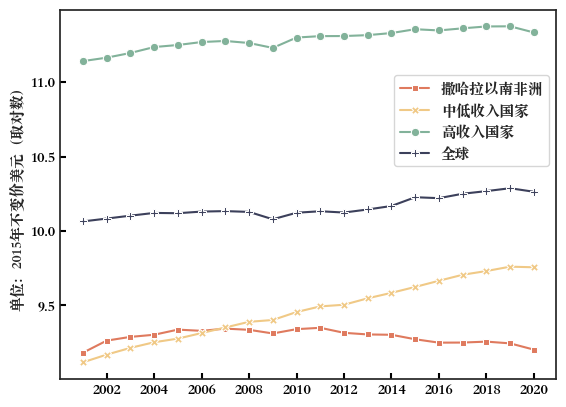

In [79]:
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)

df_ssa = df_world[
    [
        "Year",
        "Alpha-3 code",
        "Industry (including construction), value added per worker (constant 2015 US$)",
        "Industry (including construction), value added (constant 2015 US$)",
    ]
].rename(
    columns={
        "Industry (including construction), value added per worker (constant 2015 US$)": "工业",
    }
)
def ffill_with_linear_interpolation(df, col, col0):
    df = df.copy()
    ratio = (df.loc[df["Year"] == 2020, col0].values / df.loc[df["Year"] == 2019, col0].values)[0]
    df.loc[df["Year"] == 2020, col] = df.loc[df["Year"] == 2019, col].values[0] * ratio
    return df
df_ssa = df_ssa.groupby("Alpha-3 code").apply(ffill_with_linear_interpolation, "工业", "Industry (including construction), value added (constant 2015 US$)")
df_ssa['工业'] = np.log(df_ssa['工业'])

ax = sns.lineplot(
    data=df_ssa,
    x="Year",
    y="工业",
    err_style=None,
    hue="Alpha-3 code",
    hue_order=abbreviation.keys(),
    style="Alpha-3 code",
    dashes=False,
    legend=False,
    markers=True,
)

ax.legend(
    abbreviation.values(),
    loc="center right",
    bbox_to_anchor=(1, 0.7),
    ncol=1,
    fontsize=10.5,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

ax.set_xticks(range(2002, 2021, 2))
ax.set_ylabel("单位：2015年不变价美元（取对数）", size=10.5)
ax.set_xlabel("")
plt.savefig(output / "2005~2020年撒哈拉以南工业增加值每工人趋势图.png", dpi=300, bbox_inches="tight")

In [78]:
def ffill_with_linear_interpolation(df, col, col0):
    df = df.copy()
    ratio = (df.loc[df["Year"] == 2020, col0].values / df.loc[df["Year"] == 2019, col0].values)[0]
    print(ratio)
    df.loc[df["Year"] == 2020, col] = df.loc[df["Year"] == 2019, col].values[0] * ratio
    return df
df_ssa.groupby("Alpha-3 code").apply(ffill_with_linear_interpolation, "工业", "Industry (including construction), value added (constant 2015 US$)")

0.959405479290753
0.9957652063463005
0.9588456828725371
0.9764789735116829


Indicator Name    Year Alpha-3 code            工业  \
Alpha-3 code                                        
HIC          41   2001          HIC  68930.300416   
             42   2002          HIC  70535.168129   
             43   2003          HIC  72792.239892   
             44   2004          HIC  75750.527423   
             45   2005          HIC  76804.195756   
...                ...          ...           ...   
WLD          245  2016          WLD  27459.801857   
             246  2017          WLD  28286.157668   
             247  2018          WLD  28791.634812   
             248  2019          WLD  29354.737448   
             249  2020          WLD  28664.283891   

Indicator Name    Industry (including construction), value added (constant 2015 US$)  
Alpha-3 code                                                                          
HIC          41                                        9.224719e+12                   
             42                                        9.257322e+12                   
             43                                        9.475980e+12                   
             44                                        9.856277e+12                   
             45                                        1.006228e+13                   
...                                                             ...                   
WLD          245                                       2.076016e+13                   
             246                                       2.152548e+13                   
             247                                       2.225166e+13                   
             248                                       2.266061e+13                   
             249                                       2.212761e+13                   

[80 rows x 4 columns]

In [69]:
df_ssa.query("Year >= 2019")

Indicator Name    Year Alpha-3 code         工业  \
Alpha-3 code                                     
HIC          59   2019          HIC  11.374490   
             60   2020          HIC        NaN   
LMY          122  2019          LMY   9.760516   
             123  2020          LMY        NaN   
SSA          185  2019          SSA   9.245422   
             186  2020          SSA        NaN   
WLD          248  2019          WLD  10.287209   
             249  2020          WLD        NaN   

Indicator Name    Industry (including construction), value added (constant 2015 US$)  
Alpha-3 code                                                                          
HIC          59                                        1.187482e+13                   
             60                                        1.139276e+13                   
LMY          122                                       1.048370e+13                   
             123                                       1.043931e+13                   
SSA          185                                       4.375108e+11                   
             186                                       4.195053e+11                   
WLD          248                                       2.266061e+13                   
             249                                       2.212761e+13

In [18]:
df = df_world

In [53]:
df_world.query("`Alpha-3 code` == 'SSA'")[["Year", "Forest area (% of land area)", "Fertilizer consumption (kilograms per hectare of arable land)"]]

Indicator Name,Year,Forest area (% of land area),Fertilizer consumption (kilograms per hectare of arable land)
167,2001,29.544296,12.376576
168,2002,29.397943,13.826018
169,2003,29.251590,12.252464
170,2004,28.923273,12.564607
171,2005,28.777781,11.660088
172,2006,28.632352,14.050863
173,2007,28.486859,12.738392
174,2008,28.341467,13.034835
175,2009,28.195990,12.991551
176,2010,28.049741,15.403389


In [46]:
d = df_world[['Alpha-3 code',
          'Year',
          "Adjusted savings: mineral depletion (% of GNI)",
          "Adjusted savings: energy depletion (% of GNI)",
        "Adjusted savings: natural resources depletion (% of GNI)"
         ]].query("`Alpha-3 code` in ['WLD', 'SSA'] and Year in [2001, 2020]")

d

Indicator Name,Alpha-3 code,Year,Adjusted savings: mineral depletion (% of GNI),Adjusted savings: energy depletion (% of GNI),Adjusted savings: natural resources depletion (% of GNI)
167,SSA,2001,0.275789,3.184277,5.391983
186,SSA,2020,0.707175,1.762052,4.020282
230,WLD,2001,0.030103,0.905799,0.993008
249,WLD,2020,0.152608,0.557555,0.790953


In [20]:
d2 = df[['Alpha-3 code',
          'Year',
          "Scientific and technical journal articles",
          "Population, total"
         ]].query("`Alpha-3 code` == 'SSA'")
d2['pct'] = (d2['Scientific and technical journal articles']/d2['Population, total'])*1_0000
d2

Indicator Name,Alpha-3 code,Year,Scientific and technical journal articles,"Population, total",pct
167,SSA,2001,7611.127138,6.890808e+08,0.110453
168,SSA,2002,8219.942888,7.076097e+08,0.116165
169,SSA,2003,8344.612476,7.267027e+08,0.114828
170,SSA,2004,9148.139826,7.464643e+08,0.122553
171,SSA,2005,10047.998994,7.668958e+08,0.131022
172,SSA,2006,11150.572755,7.880254e+08,0.141500
173,SSA,2007,11895.893175,8.099342e+08,0.146875
174,SSA,2008,12583.182241,8.325558e+08,0.151139
175,SSA,2009,14264.020199,8.557984e+08,0.166675
176,SSA,2010,15525.076347,8.797076e+08,0.176480


In [21]:
df_world.query("`Alpha-3 code` == 'WLD'")["Scientific and technical journal articles"].div(df_world.query("`Alpha-3 code` == 'WLD'")["Population, total"], axis=0) * 1_0000

230    1.782133
231    1.835845
232    1.900939
233    2.052151
234    2.273640
235    2.382026
236    2.454623
237    2.562295
238    2.678739
239    2.768666
240    2.875056
241    2.917558
242    2.973493
243    3.038037
244    3.073053
245    3.145309
246    3.207262
247    3.348925
248    3.532318
249    3.750191
dtype: float64

In [22]:
df_world.query("`Alpha-3 code` == 'SSA'")['Incidence of HIV, all (per 1,000 uninfected population)']

167    3.039049
168    2.864365
169    2.697673
170    2.552549
171    2.410793
172    2.270837
173    2.132069
174    1.989329
175    1.865722
176    1.738314
177    1.617974
178    1.508278
179    1.392035
180    1.288443
181    1.193944
182    1.117617
183    1.017200
184    0.915311
185    0.831864
186    0.745376
Name: Incidence of HIV, all (per 1,000 uninfected population), dtype: float64

In [26]:
df_world.query("`Alpha-3 code` in ['WLD', 'SSA'] and Year in [2001, 2020]").set_index(['Alpha-3 code', 'Year'])[[
    'Access to electricity (% of population)',
    'Individuals using the Internet (% of population)',
    'People using at least basic drinking water services (% of population)',
    'Prevalence of undernourishment (% of population)',
]]

Indicator Name     Access to electricity (% of population)  \
Alpha-3 code Year                                            
SSA          2001                                26.104066   
             2020                                48.477431   
WLD          2001                                78.845438   
             2020                                90.483629   

Indicator Name     Individuals using the Internet (% of population)  \
Alpha-3 code Year                                                     
SSA          2001                                          0.655312   
             2020                                         31.820210   
WLD          2001                                          8.053556   
             2020                                         59.641842   

Indicator Name     People using at least basic drinking water services (% of population)  \
Alpha-3 code Year                                                                          
SSA          2001                                          45.575625                       
             2020                                          64.411910                       
WLD          2001                                          81.016615                       
             2020                                          89.988524                       

Indicator Name     Prevalence of undernourishment (% of population)  
Alpha-3 code Year                                                    
SSA          2001                                         25.932200  
             2020                                         20.901154  
WLD          2001                                         13.100000  
             2020                                          9.300000

In [29]:
[col for col in df_final if "fdi" in col.lower()]

['FDI inflows (Millions of dollars)',
 'FDI instock (Millions of dollars)',
 'Number of announced greenfield FDI projects, by destination',
 'Value of announced greenfield FDI projects, by destination (Millions of dollars)',
 'greenfdistock',
 'mafdistock',
 'FDIstock',
 '           6.12 Business impact of rules on FDI, 1-7 (best)',
 '           9.03 FDI and technology transfer, 1-7 (best)',
 'FDI_CN',
 'FDI_FR',
 'FDI_GB',
 'FDI_HK',
 'FDI_MO',
 'FDI_NL',
 'FDI_US',
 'FDI_USBEA']

In [44]:
fdi_sum = df_final.query("Region != 'N'").groupby("Year")["FDIstock"].sum()
southern_africa = df_final.query("Region == 'S'").groupby("Year")["FDIstock"].sum()
west_africa = df_final.query("Region == 'W'").groupby("Year")["FDIstock"].sum()
east_africa = df_final.query("Region == 'E'").groupby("Year")["FDIstock"].sum()
central_africa = df_final.query("Region == 'C'").groupby("Year")["FDIstock"].sum()
print(f"2001-2020年间，撒哈拉以南非洲FDI存量（不包括南苏丹）呈现出增长的态势，从{fdi_sum[2001]/100:.2f}亿美元增至{fdi_sum[2020]/100:.2f}亿美元，年均增长率达{(fdi_sum[2020]/fdi_sum[2001]) ** (1/19) - 1:.2%}，投资的重点区域从南非逐渐向中非、西非和东非扩散。其中，南部非洲FDI存量占撒哈拉以南非洲存量的比重从{southern_africa[2001]/fdi_sum[2001]:.2%}下降至{southern_africa[2020]/fdi_sum[2020]:.2%}，西部非洲FDI存量由{west_africa[2001]/fdi_sum[2001]:.2%}下降至{west_africa[2020]/fdi_sum[2020]:.2%}，东部非洲FDI存量由{east_africa[2001]/fdi_sum[2001]:.2%}增长至{east_africa[2020]/fdi_sum[2020]:.2%}，中部非洲FDI存量由{central_africa[2001]/fdi_sum[2001]:.2%}增长至{central_africa[2020]/fdi_sum[2020]:.2%}。到2020年，投资存量最多的地区依次为南非、西非、中非和东非。")


2001-2020年间，撒哈拉以南非洲FDI存量（不包括南苏丹）呈现出增长的态势，从1039.96亿美元增至6483.71亿美元，年均增长率达10.11%，投资的重点区域从南非逐渐向中非、西非和东非扩散。其中，南部非洲FDI存量占撒哈拉以南非洲存量的比重从53.32%下降至37.75%，西部非洲FDI存量由33.08%下降至31.97%，东部非洲FDI存量由7.02%增长至13.86%，中部非洲FDI存量由6.58%增长至16.41%。到2020年，投资存量最多的地区依次为南非、西非、中非和东非。


In [36]:
southern_africa[2001]/fdi_sum[2001]

0.5332498057287518

In [24]:
plt.figure(figsize=(6.4, 4.8))
sns.set_palette(flatui)

df_ssa = df_world[
    [
        "Year",
        "Alpha-3 code",
        "Gross fixed capital formation (% of GDP)",
    ]
].rename(columns={"Gross fixed capital formation (% of GDP)": "agro",})


ax = sns.lineplot(
    data=df_ssa,
    x="Year",
    y="农业",
    err_style=None,
    hue="Alpha-3 code",
    hue_order=abbreviation.keys(),
    style="Alpha-3 code",
    dashes=False,
    legend=False,
    markers=True,
)

ax.legend(
    abbreviation.values(),
    loc="center right",
    bbox_to_anchor=(1, 0.7),
    ncol=1,
    fontsize=10.5,
)
ax.tick_params(left=True, right=False, bottom=True, top=False, **common_tick_params)

ax.set_xticks(range(2005, 2021, 5))
ax.set_ylabel("化肥", size=10.5)
ax.set_xlabel("")
#plt.savefig(output / "2005~2020年撒哈拉以南通货膨胀率趋势图.png", dpi=300, bbox_inches="tight")

ValueError: Could not interpret value `农业` for parameter `y`

<Figure size 640x480 with 0 Axes>